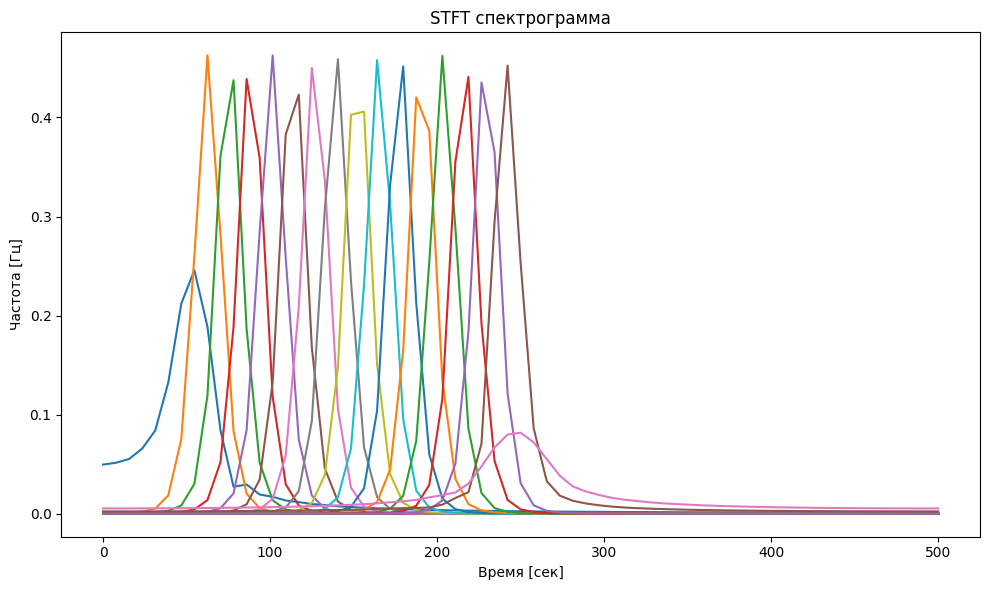

In [12]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Параметры сигнала
fs = 1000  # Частота дискретизации (Гц)
T = 1.0    # Длительность сигнала (сек)
n = int(fs * T)  # Количество отсчетов
t = np.linspace(0, T, n, endpoint=False)

# Создание тестового сигнала (синусоида с изменяющейся частотой)
f1, f2 = 50, 250  # Начальная и конечная частоты (Гц)
Signal = np.sin(2*np.pi * (f1*t + (f2-f1)*t**2/(2*T)))

# Параметры STFT
window_size = 128  # Размер окна в отсчетах
overlap = 0.5 * window_size # Перекрытие окон в отсчетах
window = 'hann'    # Тип окна ('hann', 'hamming', 'blackman' и др.)

# Вычисление STFT
f, t_stft, Zxx = signal.stft(Signal, fs=fs, window=window, 
                            nperseg=window_size, noverlap=overlap)

# Визуализация спектрограммы
plt.figure(figsize=(10, 6))
#plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
plt.plot(f,np.abs(Zxx))
plt.title('STFT спектрограмма')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [сек]')
#plt.colorbar(label='Амплитуда')
plt.tight_layout()
plt.show()

Частота дискретизации: 250 МГц
Размер массива данных (БПФ = это количество отсчётов, используемых в алгоритме Быстрого Преобразования Фурье) = 5000
Количесвто частот = 32768
Размер окна: 4
Перекрытие окон: 2
Частотное разрешение Δf = 50 кГц
Ширина окна в секундах: 2e-08


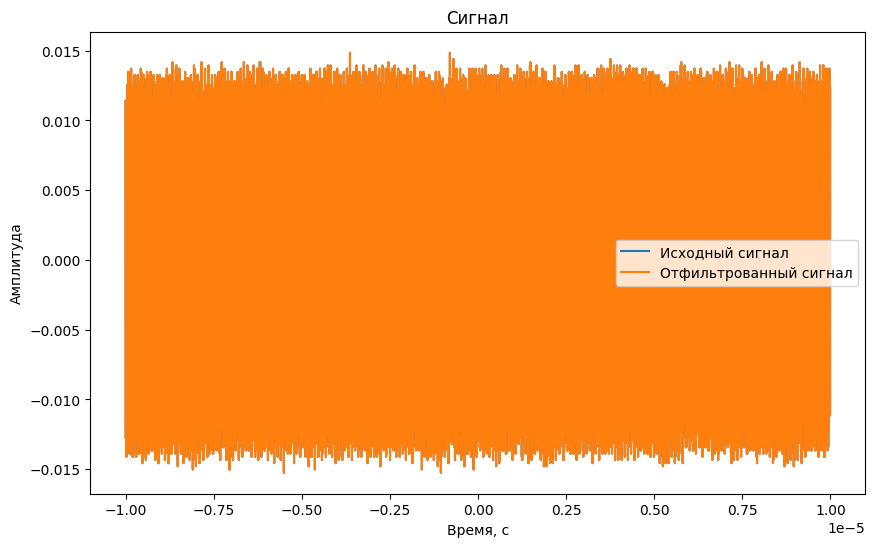

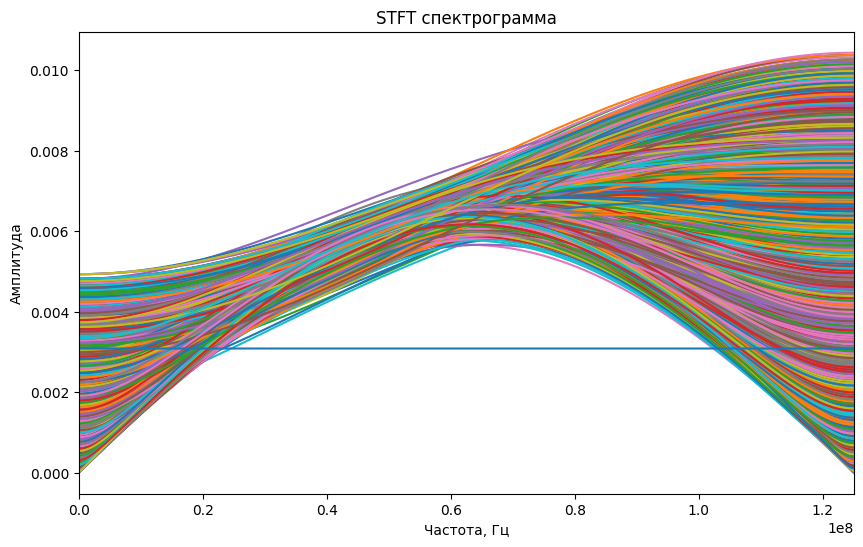

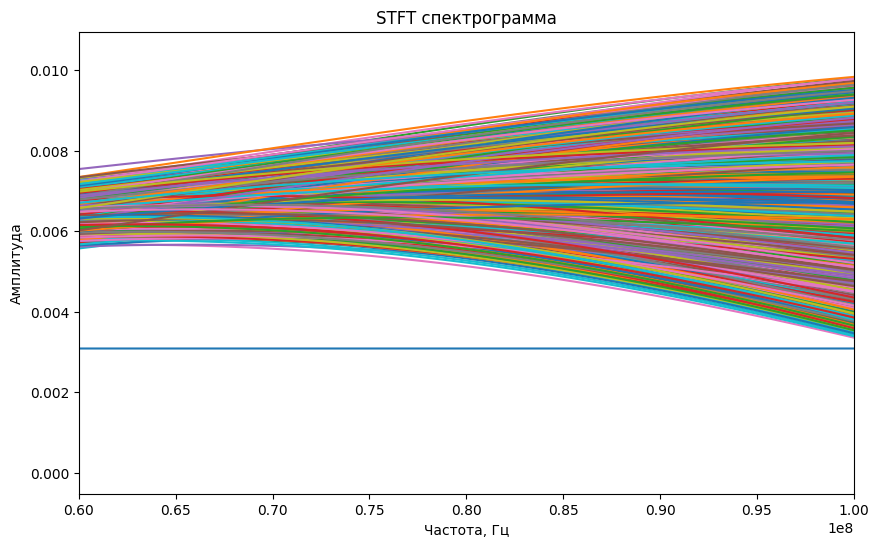

In [ ]:
import math
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.signal import savgol_filter, find_peaks, peak_widths
from scipy import signal
import matplotlib.pyplot as plt
#%matplotlib qt
df = pd.read_csv('2mks_aom_10kpts0.csv')
t_signal = np.array(df.iloc[:,0])
Amp_signal = np.array(df.iloc[:,1])
filtered_signal = savgol_filter(Amp_signal, window_length = 3 , polyorder = 2)
plt.figure(figsize = (10,6))
plt.plot(t_signal, Amp_signal, label = 'Исходный сигнал')
plt.plot(t_signal, filtered_signal, label = 'Отфильтрованный сигнал')
plt.title('Сигнал')
plt.ylabel('Амплитуда')
plt.xlabel('Время, с')
plt.legend()
Fs = 1 / (t_signal[1] - t_signal[0])
print("Частота дискретизации:", round(Fs/1e6), "МГц")
dt = 1 / Fs
window_size_t = 2e-8 #(t_signal[-1] - t_signal[0]) / 128
window_size = round(window_size_t * Fs)  #round((t_signal[-1] - t_signal[0]) / 128 * Fs) 
window_size = 2**int(np.log2(window_size))
overlap_factor = int(0.5 * window_size)
window = 'hann' #boxcar, hamming, hann
print("Размер массива данных (БПФ = это количество отсчётов, используемых в алгоритме Быстрого Преобразования Фурье) =",np.shape(t_signal)[0])
number_frequency = window_size * 2 #2**int(np.log2(np.shape(t_signal)[0])) 
print("Количесвто частот =", number_frequency)
print("Размер окна:",window_size)
print("Перекрытие окон:",overlap_factor)
print("Частотное разрешение Δf =", round(Fs / np.shape(t_signal)[0] / 1e3),"кГц")
print("Ширина окна в секундах:",window_size_t)
f_stft, t_stft, Zxx = signal.stft(
    filtered_signal,  # Входной сигнал
    fs = Fs, # Частота дискретизации
    window = window, # Оконная функция
    nperseg = window_size, # Размер окна
    noverlap = overlap_factor, # Перекрытие окон
    nfft = number_frequency # Количество точек FFT (можно увеличить для интерполяции)
)
plt.figure(figsize = (10,6))
plt.plot(f_stft, np.abs(Zxx))
plt.xlim(0, Fs / 2)
plt.title('STFT спектрограмма')
plt.ylabel('Амплитуда')
plt.xlabel('Частота, Гц')
plt.figure(figsize = (10,6))
plt.plot(f_stft, np.abs(Zxx))
plt.xlim(60e6, 100e6)
plt.title('STFT спектрограмма')
plt.ylabel('Амплитуда')
plt.xlabel('Частота, Гц')
plt.figure(figsize = (10,6))
plt.pcolormesh(t_stft, f_stft, np.abs(Zxx), shading='gouraud')
plt.title('STFT спектрограмма')
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [сек]')
plt.colorbar(label='Амплитуда')
plt.tight_layout()
plt.show()
'''Размер окна: большее окно дает лучшее частотное разрешение, но худшее временное. 
Перекрытие окон: обычно 50-75% от размера окна.
Больше частот → лучше разрешение, но медленнее вычисления и хуже временная точность.
Уровень боковых лепестков: −31.5 дБ - для hann.
Уровень боковых лепестков: −42 дБ - для hamming.
У hamming ширина на уровне -3 дБ больше чем у hann.
Максимальный уровень боковых лепестков частотной характеристики: −13.26 дБ - для boxcar (прямоугольное окно)'''